<center><h1>Polynomial Regression</h1></center>

<br><h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#import_data">Import the Data</a></li>
        <li><a href="#prepare_data">Prepare the data in</a></li>
        <li><a href="#poly_regression">Polynomial Regression Model</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
    </ol>
</div>
<br>
<hr>

In [69]:
#import packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')
%matplotlib inline

<br><br><h2 id='import_data'>Import the Data</h2><br>

In [5]:
#import data
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h2 id='prepare_data'>Prepare the Data</h2>

In [27]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,256.228679
std,1.415895,1.797447,4.101253,2.794510,63.372304
min,1.000000,3.000000,4.600000,4.900000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,294.000000
max,8.400000,12.000000,30.200000,20.500000,488.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 5 columns):
ENGINESIZE              1067 non-null float64
CYLINDERS               1067 non-null int64
FUELCONSUMPTION_CITY    1067 non-null float64
FUELCONSUMPTION_HWY     1067 non-null float64
CO2EMISSIONS            1067 non-null int64
dtypes: float64(3), int64(2)
memory usage: 41.8 KB


In [29]:
df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,9.9,6.7,196
1,2.4,4,11.2,7.7,221
2,1.5,4,6.0,5.8,136
3,3.5,6,12.7,9.1,255
4,3.5,6,12.1,8.7,244


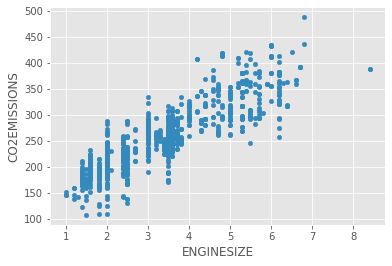

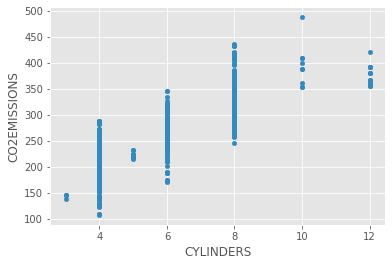

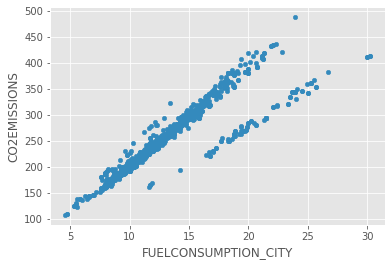

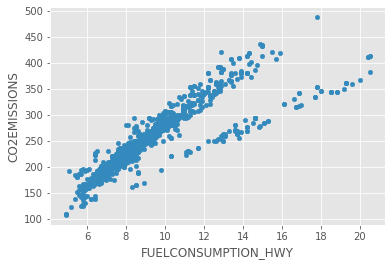

In [30]:
df.plot(kind='scatter', x='ENGINESIZE', y='CO2EMISSIONS')
df.plot(kind='scatter', x='CYLINDERS', y='CO2EMISSIONS')
df.plot(kind='scatter', x='FUELCONSUMPTION_CITY', y='CO2EMISSIONS')
df.plot(kind='scatter', x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS')

plt.show()

<br><br><h2 id='poly_regression'>Polynomial Regression Model</h2><br>

polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

   $y = b + \theta_1  x + \theta_2 x^2$

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [101]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

test_x = np.asanyarray(df[['ENGINESIZE']])
test_y = np.asanyarray(df[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [102]:
lr = linear_model.LinearRegression()
lr.fit(train_x_poly, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [103]:
print('Coefficient:',lr.coef_)
print('Intercept:',lr.intercept_)

Coefficient: [[ 0.         50.21277583 -1.47931126]]
Intercept: [107.72954763]


Text(0, 0.5, 'CO2 Emission')

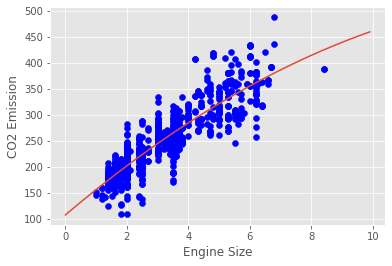

In [104]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
YY = lr.intercept_[0]+ lr.coef_[0][1]*XX+ lr.coef_[0][2]*np.power(XX, 2)

plt.plot(XX,YY)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')

<br><br><h2 id='evaluation'>Evaluation</h2><br>

In [105]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
pred = lr.predict(test_x_poly)

print('Mean Absolut Square Error:%.2f' % np.mean(np.absolute(pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(pred, test_y) )

Mean Absolut Square Error:23.31
Residual sum of squares (MSE): 936.33
R2-score: 0.70



<br>

End of notebook...
<hr>